## Inside the layers : Mobile Net

In [1]:
### In this file, I am going to dig deep inside the layers of Mobile net model
### I will see the different layers and the outputs given by them

### ------------------loading the libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import tensorflow
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.preprocessing.image import load_img, array_to_img, img_to_array

### -----------------------loading the test images and the model

In [3]:
### I will take a few test images from the binary classification, as they are 
### more of clear images and also easier to deal with, when it comes to the 
### the things like Feature map and all that

In [4]:
model = load_model('../models/modified_mobile_net.h5')

In [6]:
test_images = []
target_size = (224, 224, 3)
basedir = '../../binary classification/data/raw/test/dogs'

In [7]:
for images_path in os.listdir(basedir) : 
    actual_image_path = os.path.join(basedir, images_path)

    try : 
        images = load_img(actual_image_path, target_size = target_size)
        images = img_to_array(images) / 255.0

        test_images.append(images)

    except Exception as e  :
        print(f"error loading the image : {actual_image_path} : {e}")

In [9]:
test_images = np.array(test_images)

In [10]:
test_images.shape

(70, 224, 224, 3)

In [17]:
dummy_image = np.zeros((5, 224, 224, 3))

In [18]:
dummy_image.shape

(5, 224, 224, 3)

### ------------------checking the list and the number of layers

In [19]:
for i, layer in enumerate(model.layers) : 
    print(f"{i} : {layer} : {layer.name}")

0 : <InputLayer name=input_layer_1, built=True> : input_layer_1
1 : <Conv2D name=Conv1, built=True> : Conv1
2 : <BatchNormalization name=bn_Conv1, built=True> : bn_Conv1
3 : <ReLU name=Conv1_relu, built=True> : Conv1_relu
4 : <DepthwiseConv2D name=expanded_conv_depthwise, built=True> : expanded_conv_depthwise
5 : <BatchNormalization name=expanded_conv_depthwise_BN, built=True> : expanded_conv_depthwise_BN
6 : <ReLU name=expanded_conv_depthwise_relu, built=True> : expanded_conv_depthwise_relu
7 : <Conv2D name=expanded_conv_project, built=True> : expanded_conv_project
8 : <BatchNormalization name=expanded_conv_project_BN, built=True> : expanded_conv_project_BN
9 : <Conv2D name=block_1_expand, built=True> : block_1_expand
10 : <BatchNormalization name=block_1_expand_BN, built=True> : block_1_expand_BN
11 : <ReLU name=block_1_expand_relu, built=True> : block_1_expand_relu
12 : <ZeroPadding2D name=block_1_pad, built=True> : block_1_pad
13 : <DepthwiseConv2D name=block_1_depthwise, built=Tru

In [34]:
# model.summary()

In [21]:
from collections import Counter

In [22]:
unique_layers = list({type(layer).__name__ for layer in model.layers})
layers_count = Counter(unique_layers)

In [23]:
print(unique_layers)

['Add', 'Conv2D', 'DepthwiseConv2D', 'GlobalAveragePooling2D', 'ReLU', 'ZeroPadding2D', 'BatchNormalization', 'InputLayer', 'Dense']


In [24]:
print(layers_count)

Counter({'Add': 1, 'Conv2D': 1, 'DepthwiseConv2D': 1, 'GlobalAveragePooling2D': 1, 'ReLU': 1, 'ZeroPadding2D': 1, 'BatchNormalization': 1, 'InputLayer': 1, 'Dense': 1})


In [26]:
layers_type = [layer.__class__.__name__ for layer in model.layers]
counter = Counter(layers_type)

In [27]:
print(counter)

Counter({'BatchNormalization': 52, 'Conv2D': 35, 'ReLU': 35, 'DepthwiseConv2D': 17, 'Add': 10, 'ZeroPadding2D': 4, 'Dense': 2, 'InputLayer': 1, 'GlobalAveragePooling2D': 1})


### --------------checking the conv2d layer

In [31]:
_ = model.predict(dummy_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [32]:
inference_model = Model(inputs = model.inputs, outputs = model.get_layer('Conv1').output)
feature_map = inference_model.predict(test_images)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


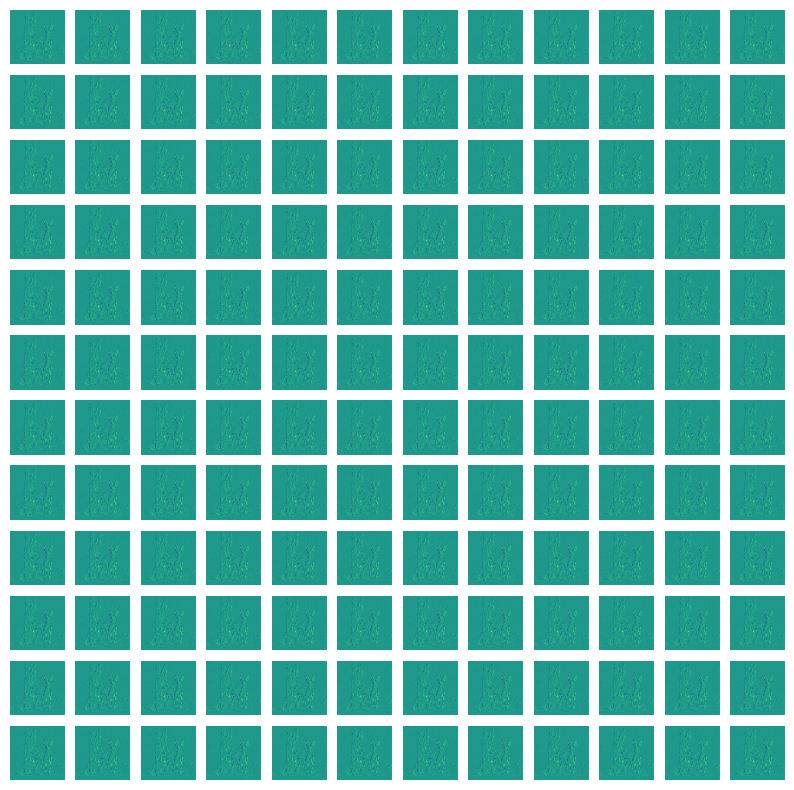

In [37]:
plt.figure(figsize = (10, 10))
for i in range(min(144, 1000)) : 
    plt.subplot(12, 12, i + 1)
    plt.imshow(feature_map[41, :, :, 1], cmap = 'viridis')
    plt.axis('off')
plt.show()